 В этом юните мы с вами поговорим об основных принципах работы с файлами в языке Python — какие встроенные методы используются для открытия, закрытия, чтения, построчного чтения и так далее.

На самом деле файлы, как и всё в Python, являются объектами класса. Причём этот класс встроен в Python. У файлов есть свои атрибуты и методы.

Давайте на примере работы с файлами разберём, как работают классы, реализованные «под капотом» в Python ↓

***Путь к файлу***

*Путь*- набор символов показывающий расположение файла или каталога в файловой системе 

В операционных системах UNIX разделительным знаком при записи пути является «/» (слеш), в Windows — «\» (обратный слеш). Эти знаки служат для разделения названия каталогов, составляющих путь к файлу. Все вы видели, например, такой путь на ОС Windows: C:\Program Files. Это и есть путь до папки Program Files.

Существует два типа пути:

абсолютный;
относительный.
Абсолютный путь всегда считается от «корня», той папки, откуда потом «вырастают» все остальные папки. Для Windows это диск С:, D: и т. д., для Unix это “/”. Абсолютный путь всегда уникальный

Абсолютный путь — это путь, который указывает на одно и то же место в файловой системе, вне зависимости от текущего рабочего каталога или других обстоятельств. Его ещё называют полным.

Относительный путь — это путь по отношению к текущему рабочему каталогу пользователя.

Чтобы поработать с путями, есть модуль os. Функция os.chdir() позволяет нам изменить директорию, которую мы в данный момент используем. Если вам нужно знать, какой путь вы в данный момент используете, для этого нужно вызвать os.getcwd().

примечания: Все дальнейшие пути указаны для конкретной машины на OC Linux. у вас эти результаты будут отличаться

In [123]:
import os
# получить текущий путь
start_path = os.getcwd()
print(start_path) # /home/nbuser/library



d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP


In [124]:
os.chdir("..") # подняться на один уровень выше
os.getcwd() # '/home/nbuser'

'd:\\idi\\skilfaktory\\PYTHON-10. Введение в Pandas\\clearDATA'

Теперь вернемся в ту директорию, из которой стартовали. Изначально мы сохраняли её в переменной start_path.

In [125]:
os.chdir(start_path)
os.getcwd() # '/home/nbuser/library'

'd:\\idi\\skilfaktory\\PYTHON-10. Введение в Pandas\\clearDATA\\bonus_OOP'

С помощью функции os.listdir() можно получить весь список файлов, находящихся в директории. Если не указать никаких аргументов, то будет взята текущая директория.

In [126]:
print(os.listdir())

if 'tmp.py' not in os.listdir():
    print('file unavailable')

['bonus_OOP.ipynb', 'path_to_fail.ipynb', 'test.txt']
file unavailable


Для того чтобы склеивать пути с учётом особенностей ОС, следует использовать функцию os.path.join(). Это связано с тем, что в разных операционных системах могут быть разные разделители каталогов, например в ОС Windows этим разделителем является «\», а в Linux — «/», как мы и говорили в начале юнита. Поэтому, чтобы поиск файла проходил гладко в обеих системах (ведь ваш скрипт могут запускать на любой системе в связи с кросс-платформенностью Python), лучше всё-таки использовать os.path.join()

In [127]:
# соединяет пути с учётом особенностей операционной системы
print(start_path)
print(os.path.join(start_path, 'test'))

# /home/nbuser/library
# /home/nbuser/library/test

d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP
d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP\test


Задание 7.3
Задание на самопроверку.

Сделайте функцию, которая принимает от пользователя путь и выводит всю информацию о содержимом этой папки. Для реализации используйте функцию встроенного модуля os.walk(). Если путь не указан, то сравнение начинается с текущей директории.

In [128]:
def walk_desc(path=None):
    start_path=path if path is not None else os.getcwd()
    
    for root,dirs,files in os.walk(start_path):
        print("Текущая директория" ,root)
        print('---')
        
        if dirs:
            print('Список папок' . dirs)
        else:
            print('Папок нет')
        
        if files:
            print('Список файлов', files)
        else:
            print("Файлов нет")
        
        if files and dirs:
            print('Все в пути:')
        for f in files:
            print("Файл ", os.path.join(root, f))
        for d in dirs:
            print("Папка ", os.path.join(root, d))
        print("===")

walk_desc()

Текущая директория d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP
---
Папок нет
Список файлов ['bonus_OOP.ipynb', 'path_to_fail.ipynb', 'test.txt']
Файл  d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP\bonus_OOP.ipynb
Файл  d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP\path_to_fail.ipynb
Файл  d:\idi\skilfaktory\PYTHON-10. Введение в Pandas\clearDATA\bonus_OOP\test.txt
===


Данный фрагмент написан на языке Python и использует модуль os для работы с операционной системой. Он определяет функцию walk_desc, которая принимает путь к директории в качестве аргумента, а если аргумент не указан, то используется текущая рабочая директория, полученная с помощью функции os.getcwd().

Функция os.walk перебирает все директории и файлы в указанной директории, возвращая кортеж из трёх элементов: root (абсолютный путь к текущей директории), dirs (список поддиректорий в текущей директории) и files (список файлов в текущей директории).

В теле функции walk_desc выводятся следующие данные:
* Текущая директория — выводится с помощью переменной root.
* Список папок — выводится, если в директории есть поддиректории (проверяется с помощью условия if dirs).
* Список файлов — выводится, если в директории есть файлы (проверяется с помощью условия if files).
* Все пути — выводятся пути ко всем файлам и папкам в текущей директории.

Наконец, функция walk_desc вызывается без аргументов, что приводит к обходу текущей рабочей директории.

***Работа с файлами***


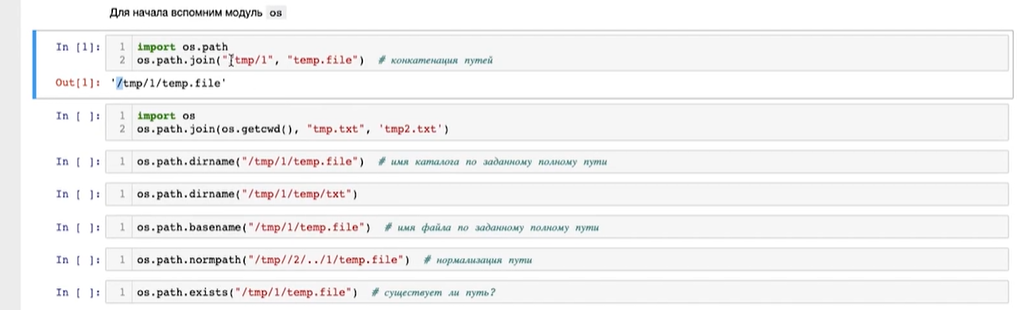

In [129]:
#f = open('test.txt', 'w', encoding='utf8')
#указывает на текущую позицию
#f.tell()

f = open('path/to/file', 'filemode', encoding='utf8')
езультатом этой операции будет файл, в котором указатель текущей позиции поставлен на начало или конец файла.

Перед тем, как мы начнём разбирать аргументы, хотелось бы заранее отметить, что указателем называется скорее метка, которая указывает на определённое место в файле. Указателей в классическом понимании программиста, как, например, в C или C++ в Python нет!

Давайте по порядку разберём все аргументы:

path/to/file — путь к файлу может быть относительным или абсолютным. Можно указывать в Unix-стиле (path/to/file) или в Windows-стиле (path\to\file).
filemode — режим, в котором файл нужно открывать.

Записывается в виде строки, может принимать следующие значения:
r — открыть на чтение (по умолчанию);
w — перезаписать и открыть на запись (если файла нет, то он создастся);
x — создать и открыть на запись (если уже есть — исключение);
a — открыть на дозапись (указатель будет поставлен в конец);
t — открыть в текстовом виде (по умолчанию);
b — открыть в бинарном виде.
encoding — указание, в какой кодировке файл записан (utf8, cp1251 и т. д.) По умолчанию стоит utf-8. При этом можно записывать кодировку как через дефис, так и без: utf-8 или utf8.


In [130]:
f = open('test.txt', 'w', encoding='utf8')

# Запишем в файл строку
f.write("This is a test string\n")


22

In [131]:
 f.write("This is a new string\n")
print(f.tell())


45


In [132]:
#чтобы сохранить данные надо закрыть файл 
f.close()

In [133]:
#чтобы узнать что в файое сохранилось 
f = open('test.txt' , 'r', encoding='utf8')
print(f.tell())

0


f.read(n) — операция, читающая с текущего места n символов, если файл открыт в t режиме, или n байт, если файл открыт в b режиме, и возвращающая прочитанную информацию.

In [134]:
print(f.read(10)) # This is a 

This is a 


In [135]:
# считали остаток файла
f.read() # test string\nThis is a new string\n

'test string\nThis is a new string\n'

In [136]:
# обязательно закрываем файл


Указатель можно перемещать вручную по файлу  с помощью функции
f.seek(offset(, from_what=0))
from_what:\
0 - с начала файла\
1 с того места где мы сейчас (только для b)\
2- с конца файла 

In [137]:
f.seek(1)

1

In [138]:
#f.seek(-2,2) #не работает потому что не b

f.close()

***Чтение и запись построчно***\
Зачастую с файлами удобнее работать построчно, поэтому для этого есть отдельные методы:

writelines — записывает список строк в файл;
readline — считывает из файла одну строку и возвращает её;
readlines — считывает из файла все строки в список и возвращает их.
Метод f.writelines(sequence) не будет сам за вас дописывать символ конца строки ('\n'), поэтому при необходимости его нужно прописать вручную.

In [139]:
f = open('test.txt', 'a', encoding='utf8') # открываем файл на дозапись

sequence = ["other string\n", "123\n", "test test\n"]
f.writelines(sequence) # берет строки из sequence и записывает в файл (без переносов)

f.close()

Попробуем теперь построчно считать файл с помощью readlines:

In [140]:
f = open('test.txt', 'r', encoding='utf8')

print(f.readlines()) # считывает все строки в список и возвращает список

f.close()

['This is a test string\n', 'This is a new string\n', 'other string\n', '123\n', 'test test\n']


Метод f.readline() возвращает строку (символы от текущей позиции до символа переноса строки):

In [141]:
f = open('test.txt', 'r', encoding='utf8')

print(f.readline()) # This is a test string
print(f.read(4)) # This
print(f.readline()) # is a new string

f.close()

This is a test string

This
 is a new string



***Файл как итератор***\
Объект файл является итератором, поэтому его можно использовать в цикле for.

?
Для чего это нужно?

Итераторы представляют собой такой объект, который вычисляет какие-то действия на каждом шаге, а не все сразу. На примере файла это выглядит примерно так. Предположим, у вас есть огромный текстовый файл, который весит несколько гигабайт. Если попытаться разом считать его полностью с помощью f.readlines(), то он будет загружен в вашу программу, в то время как переменная, в которую будет записан файл, станет весить столько же, сколько и объём считанного файла.

В большинстве задач с обработкой текста он весь сразу не нужен, поэтому мы можем, например, считывать его построчно, обрабатывать строку и забывать из нашей программы, чтобы считать новую. Тогда весь файл огромного объема не будет «висеть» в памяти компьютера.

Не стоит считывать файл полностью — в большинстве задач с обработкой текста весь файл разом читать не требуется. В таком случае с файлом работают построчно.

In [142]:
f = open('test.txt')  # можно перечислять строки в файле
for line in f:
    print(line, end='')

# This is a test string
# This is a new string
# other string
# 123
# test test

f.close()

This is a test string
This is a new string
other string
123
test test


***Менеджер контекста with***

После работы с файлом его необходимо закрыть с помощью метода close(). Файл освобождается для операционной системы (если он был открыт для записи), и другие приложения могут получать к нему доступ. Если не закрыть файл явно, то информация, записываемая в него, может быть утеряна, или файл может повредиться.

Для явного указания места работы с файлом, а также чтобы не забывать закрывать файл после обработки, существует менеджер контекста with.

In [ ]:
# В блоке менеджера контекста открытый файл «жив» и с ним можно работать, при выходе из блока - файл закрывается.
with open("test.txt", 'rb') as f:
    a = f.read(10)
    b = f.read(23)

#
# 
# f.read(3) # Error!

Тело менеджера контекста определяется одним отступом вправо относительно отступов ключевого слова with. Менеджер контекста неявно вызывает закрытие файла после работы, что освобождает вас от забот о том, закрыли ли вы файл или нет. Закрытие файла происходит при любом стечении обстоятельств, даже если внутри with будет ошибка. 

In [ ]:
ТУТ ДОЛЖНО БЫТЬ ЗАДАНИЕ НА САМОПРОВЕРКУ 

In [1]:
print('before the exception')
c= 1/0
print('after the exception')

before the exception


ZeroDivisionError: division by zero

In [2]:
print('before the exception')
a=int(input("a:"))
b=int(input("b:"))
c=a/b
print(c)
print('After the exception')

before the exception


ZeroDivisionError: division by zero

TRY-Except

In [ ]:
try:# добавляем конструкцию try-expect для отлова нашей ошибки
    print('Before the exception')
    #теперь пользователь сам вводит числа для деления
    a=int(input('a:'))#
    b= int(input('b:'))#
    c=a/b #здесь может возникнуть исключение деление на 0
    print(c) #печатаем с=a/b если все хорошо
except ZeroDivisionError as e:#добавляем тип ошибки который может выйти 
    print(e) #выводим информацию
    print('After the exception')

Before the exception
division by zero
After the exception


В данном случае тоже может возникнуть ошибка деления на ноль, если пользователь введёт b = 0. Поэтому мы отлавливаем ошибку ZeroDivisionError. В блоке try помещается «опасный» кусок кода, который может вызывать исключения, а в блоке except указывается класс ошибки, которую мы хотим отловить, а затем помещается код, который нужно выполнить в случае возникновении ошибки. 

После возникновении ошибки код в блоке try прервётся, перейдёт в блок except, а затем продолжит выполняться дальше — программа не вылетает, как это было без обработчика исключений. В этом и есть главная суть конструкции try-except.

Это ещё не всё! Есть также блоки finally и else. Код в блоке else выполнялся после завершения цикла. С try-except есть нечто похожее. Посмотрите на пример кода ниже.

In [7]:
try:
    print('before the exception')
    a=int(input('A:'))
    b= int(input('b:'))
    c= (a/b)-a*b
except ZeroDivisionError as e:#добавляем тип ошибки который может выйти 
    print(e) #выводим информацию
else:
    print(c)
finally:
    print('After the exception') 

before the exception
-3.0
After the exception


In [10]:
try:
    print("Перед исключением")
    a = int(input("a: "))
    b = int(input("b: "))
    c = a / b
    print(c)  # печатаем c = a / b если всё хорошо
except ZeroDivisionError as e:
    print("После исключения")
else:  # код в блоке else выполняется только в том случае, если код в блоке try выполнился успешно (т.е. не вылетело никакого исключения).
    print("Всё ништяк")
finally:  # код в блоке finally выполнится в любом случае, при выходе из try-except
    print("Finally на месте")
 
print("После После исключения")

Перед исключением
2.0
Всё ништяк
Finally на месте
После После исключения


Код в блоке else не выполнится, поскольку было исключение, а код в блоке finally выполняется в обоих случаях.

Конечно, мы можем вызывать ошибки самостоятельно с помощью конструкции raise. Используется это, как правило, для отладки кода и остановки программы в критических ситуациях.

In [12]:
age=int(input('how old are you?'))

if age>100 or age<0:
    raise ValueError('It is false! You can not to be that old!')
print(f"You {age} old")

You 15 old


In [ ]:
try:
    age=int(input('How old are you?'))
    
    if age>100 or age<0:
        raise ValueError('It is false! You can not to be that old')
    print(f" You {age} old")
except ValueError:
    print('It is not the wrong age')
    

Давайте кратко подведём итоги:

Исключения — это ошибки, которые выбрасываются при неправильной работе программы, и останавливают её выполнение, если они не обработаны.
Конструкция try-except выглядит следующим образом и служит для обработки исключений:
try:
    *код, который может вызвать ту или иную ошибку*
except *ошибка*:
    *код, который выполнится в случае возникновения ошибки*
else:
    *код, который выполнится только в случае если в try ничего не сломалось*
finally:
    *код, который выполнится по любому*
Блоки finally и else являются не обязательными, но могут быть использованы для вашего удобства. Код из блока finally выполняется в любом случае, независимо от исхода в блоках try-except. Код из блока else выполняется только в случае успешного выполнения кода в try.
Выбрасывать ошибки можно и по своему желанию с помощью конструкции raise *Тип ошибки* (сообщение, которое нужно вывести в консоль).

In [22]:
try:
    number=int(input('Enter the number:'))
except ValueError as e:
    print('You enter the wrong number')
else:
    print(f'You enter {number}')
finally:
    print('Exit from the program')

You enter 44
Exit from the program


**9. Тонкости обработки исключений. Собственные классы исключений**


BaseException\
 +-- SystemExit\
 +-- KeyboardInterrupt\
 +-- GeneratorExit\
 +-- Exception\
  	  +-- StopIteration\
  	  +-- StopAsyncIteration\
  	  +-- ArithmeticError\
  	    |	FloatingPointError\
  	    |	OverflowError\
  	    |	ZeroDivisionError\
      +-- AssertionError\
  	  +-- AttributeError\
  	  +-- BufferError\
  	  +-- EOFError\
  	  +-- ImportError\
  	    |	+-- ModuleNotFoundError\
  	  +-- LookupError\
  	    |	+-- IndexError\
  	    |	+-- KeyError\
      +-- MemoryError\
  	  +-- NameError\
  	    |	+-- UnboundLocalError\
    	+-- OSError\
  	    |	+-- BlockingIOError\
  	    |	+-- ChildProcessError\
  	    |	+-- ConnectionError\
  	    |	|	+-- BrokenPipeError\
  	    |	|	+-- ConnectionAbortedError\
       	| 	|	+-- ConnectionRefusedError\
  	    |	|	+-- ConnectionResetError\
  	    |	+-- FileExistsError\
  	    |	+-- FileNotFoundError\
  	    |	+-- InterruptedError\
  	    |	+-- IsADirectoryError\
  	    |	+-- NotADirectoryError\
  		|	+-- PermissionError\
  		|	+-- ProcessLookupError\
  		|	+-- TimeoutError\
    	+-- ReferenceError\
    	+-- RuntimeError\
  		|	+-- NotImplementedError\
  		|	+-- RecursionError\
  	+-- SyntaxError\
  		|	+-- IndentationError\
  		|     	+-- TabError\
  	+-- SystemError\
  	+-- TypeError\
  	+-- ValueError\
		|	+-- UnicodeError\
  		|     	+-- UnicodeDecodeError\
  		|     	+-- UnicodeEncodeError\
  		|     	+-- UnicodeTranslateError\
  	+-- Warning\
        	+-- DeprecationWarning\
        	+-- PendingDeprecationWarning\
        	+-- RuntimeWarning\
        	+-- SyntaxWarning\
        	+-- UserWarning\
        	+-- FutureWarning\
        	+-- ImportWarning\
        	+-- UnicodeWarning\
        	+-- BytesWarning\
        	+-- ResourceWarning\
Эта система — дерево стандартных исключений.\

Действуя от обратного, однако, надо быть осторожным. Если, например, надо поймать несколько исключений, то идти следует вверх по дереву.

In [24]:
try:
    raise ZeroDivisionError
except ArithmeticError:
    print('Arithmetic Error')
except ZeroDivisionError:
    print("Zero Division Error")

Arithmetic Error


ArithmeticError является более абстрактным (находящимся выше в иерархическом дереве, родительским) классом. Если вы хотите ловить сначала исключения-потомки, а затем родительские исключения, убедитесь, что в блоке except отлов родительского исключения стоит ниже, чем отлов исключения-потомка. Иначе говоря, ваша конструкция отлова исключений должна идти от конкретного класса к более абстрактному.

In [26]:
# that is the right option

In [27]:
try:
    raise ZeroDivisionError
except ZeroDivisionError:
    print("ZeroDivisionError")
except ArithmeticError:
    print("ArithmeticError")

ZeroDivisionError


Если кратко обобщить, то можно сказать так: исключения — это тоже классы. Будучи классами, они могут наследоваться. «Отлавливать» можно как сам класс, так и его родителя (в любом колене). В этом случае надо убедиться в том, чтобы сначала обрабатывались более конкретные исключения, иначе они могут быть перекрыты их родителями и попросту упущены.

Иногда может понадобиться написать собственное исключение. Например, вы пишете собственную игру и вам нужно обработать ситуацию, когда ваш персонаж пытается выучить способность, при этом не достигнув нужного уровня. Или пытается положить в уже заполненный инвентарь ещё какой-то предмет.

Принцип написания и отлова собственного исключения следующий:

In [ ]:
class MyException(Exception):#creating an empty class exception
    pass


try:
    raise MyException('message')#we raise our exceptions
except MyException as e:#we catch him
    print(e) #displaying informatoin about the exception
    

Лучше всего, чтобы исключения были связаны между собой, то есть наследовались от общего класса исключения. Если продолжить пример с игрой из прошлого абзаца, то общим классом был бы GameplayException.\
Наследуются исключения для того, чтобы можно было, продолжая всё тот же пример, отлавливать отдельно игровые исключения и отдельно исключения, касающиеся ресурсов (закончилась оперативная память, место на диске и так далее.

Давайте теперь попробуем построить собственные исключения с наследованием:


In [28]:
class ParentException(Exception):# creating an empty class exception, parennt is exception
    pass
class ChildExceptoin(ParentException): # creating an empty class exception-child, parent is ParentException
    pass

try:
    raise ChildExceptoin('message')#we raise uor exception-child
except ParentException as e: #catch parent
    print(e) #display information about exception

message


В этом случае мы успешно обработали собственный класс-наследник, хотя он и не является ParentException. Когда исключение возникает, в каждом блоке except по порядку интерпретатор проверяет, является ли исключение наследником или самим классом отлавливаемого исключения, и если да, то выполняет код в except.

Кстати говоря, класс с самописным исключением необязательно должен быть пустым. Если вы хотите добавить собственные аргументы в конструктор, дополнительно произвести какие-либо операции, то можете спокойно это делать, главное — не забыть о нескольких нюансах:

In [29]:
class ParentException(Exception):# creating an empty class exception, parennt is exception
    def __init__(self, message, error):#write to an empty class
        #constructor that will print additional error info in the console
        
        super().__init__(message) # call the constructor the parent class
        
        print(f'Errors: {error}')# display an error
        
class ChildExceptoin(ParentException): # creating an empty class exception-child, parent is ParentException
    def __init__(self, message, error):
        super().__init__(message, error)

try:
    raise ChildExceptoin('message','error')#we raise uor exception-child
except ParentException as e: #catch parent
    print(e) #display information about exception

Errors: error
message


Давайте подведём итоги:

Исключения — это такие особенные классы, которые, как и любые классы, можно наследовать. Если вы хотите ловить несколько исключений, то сначала ловите потомков, а потом родителей, чтобы ничего не упустить.
Чтобы создать собственный класс, нужно просто написать пустой класс и наследовать его от класса Exception, этого будет достаточно.
Необязательно «отлавливать» сам класс. При необходимости можно отлавливать его родителя, это тоже будет работать, но вы можете упустить важную информацию.

In [30]:
class  NonPositiveDigitException(ValueError):
    pass

class Square(NonPositiveDigitException):
    def __init__(self, a):
        if a<=0:
            raise NonPositiveDigitException('the Side of the square is less than or equal to zero')
        